# 数理最適化

<br>

## 線形計画問題

ある工場では製品X, Yを製造している。これらは原料A、B、Cから作られており、それぞれの製品一個(1単位)を作るのに必要な原料(kg)は次の通りである。<br>
<br>

||A|B|C|
|:-:|:-:|:-:|:-:|
|X|1|2|2|
|Y|4|3|1|

<br>
工場の倉庫にある原料の量(kg)は次の表の通りである。<br>

|A|B|C|
|:-:|:-:|:-:|
|1700|1400|1000|

製造する量は整数とは限らない。製品X,Yを売るとそれぞれ利益が3ドル4ドルになる。<br>
XとYを製造する量をそれぞれx、yと置くとこのとき使われる原料Aはx+4yとなるので、制約から<br>
<br><br>
x + 4y <= 1700
<br><br>
同様にBとCを考えると、
<br><br>
2x + 3y <= 1400<br>
2x + y <= 1000<br>
x >= 0, y >= 0 <br>
3x + 4yを最大化
<br><br>
Maximise: 3x + 4y<br>
subject to: <br>
x + 4y <= 1700<br>
2x + 3y <= 1400<br>
2x + y <= 1000<br>
x >= 0, y >= 0 <br>


In [1]:
import numpy as np
from scipy import optimize

c = np.array([-3, -4], dtype=np.float64)
G = np.array([[1, 4], [2, 3], [2, 1]], dtype=np.float64)
h = np.array([1700, 1400, 1000], np.float64)
sol = optimize.linprog(c, A_ub=G, b_ub=h, bounds=(0, None))

print(sol.x)
print(sol.fun)

[400. 200.]
-2000.0


## ２次計画法

次のような二変数関数を考えます。<br>
<br>
f(x, y) = x^2 + xy + y^2 + 2x + 4y<br>
<br>
標準型
$$
\frac{1}{2} \boldsymbol{x}^T \boldsymbol{P} \boldsymbol{x} + \boldsymbol{q}^T \boldsymbol{x}
$$

In [2]:
import cvxopt

P = cvxopt.matrix(np.array([[2, 1], [1, 2]], dtype=np.float64))
q = cvxopt.matrix(np.array([2, 4], dtype=np.float64))

sol = cvxopt.solvers.qp(P, q)

print(np.array(sol['x']))
print(np.array(sol['primal objective']))

[[ 1.57009246e-16]
 [-2.00000000e+00]]
-4.0


条件付き問題<br>
Ax = b, Gx <= h<br>
<br>

Minimize: f(x, y) = x^2 + xy + y^2 + 2x + 4y<br>
Subject to: x + y = 0<br>
<br>
Minimize: f(x, y) = x^2 + xy + y^2 + 2x + 4y<br>
Subject to: 2x + 3y <= 3<br>

In [3]:
P = cvxopt.matrix(np.array([[2, 1], [1, 2]], dtype=np.float64))
q = cvxopt.matrix(np.array([2, 4], dtype=np.float64))
A = cvxopt.matrix(np.array([[1, 1]], dtype=np.float64))
b = cvxopt.matrix(np.array([0], dtype=np.float64))

sol = cvxopt.solvers.qp(P, q, A=A, b=b)

print(np.array(sol['x']))
print(np.array(sol['primal objective']))

[[ 1.]
 [-1.]]
-1.0000000000000013


In [5]:
P = cvxopt.matrix(np.array([[2, 1], [1, 2]], dtype=np.float64))
q = cvxopt.matrix(np.array([2, 4], dtype=np.float64))
G = cvxopt.matrix(np.array([[2, 3]], dtype=np.float64))
h = cvxopt.matrix(np.array([3], dtype=np.float64))

sol = cvxopt.solvers.qp(P, q, G=G, h=h)

print(np.array(sol['x']))
print(np.array(sol['primal objective']))

     pcost       dcost       gap    pres   dres
 0:  1.8858e+00  2.9758e-01  2e+00  0e+00  2e+00
 1: -2.1066e+00 -2.1546e+00  5e-02  2e-16  7e-01
 2: -3.9999e+00 -4.0665e+00  7e-02  6e-16  8e-17
 3: -4.0000e+00 -4.0007e+00  7e-04  9e-16  1e-16
 4: -4.0000e+00 -4.0000e+00  7e-06  3e-16  6e-17
 5: -4.0000e+00 -4.0000e+00  7e-08  3e-16  2e-16
Optimal solution found.
[[-2.45940164e-09]
 [-2.00000001e+00]]
-4.0


## 勾配降下法

*Minimize* : $5x^2 - 6xy + 3y^2 + 6x - 6y$

<br><br>

>- パラメータ$\alpha$, $\epsilon$ が与えられる。<br>
>- 初期点$x_k$を決める。
>- kを０から１ずつ増やしながら以下を繰り返す。<br>
>    1. $\begin{Vmatrix}\nabla f(x_k)\end{Vmatrix} \leq \epsilon$　であれば終了。<br>
>    2. $x_{k+1} = x_k - \alpha \nabla f(x_k)$　を計算する。

In [6]:
class GradienDescent:
    
    def __init__(self, f, df, alpha=0.01, eps=1e-6):
        self.f = f
        self.df = df
        self.alpha = alpha
        self.eps = eps
        self.path = None
        
    def solve(self, init):
        x = init
        path = []
        grad = self.df(x)
        path.append(x)
        while (grad**2).sum() > self.eps**2:
            x = x - self.alpha * grad
            grad = self.df(x)
            path.append(x)
        self.path_ = np.array(path)
        self.x_ = x
        self.opt_ = self.f(x)

$$
\nabla f = \left(
    \begin{array}{ccc}
        \frac{\partial f}{\partial x}\\
        \frac{\partial f}{\partial y}\\
    \end{array}
  \right)
  = 
  \left(
    \begin{array}{ccc}
        10x - 6y + 6\\
        -6x + 6y - 6\\
    \end{array}
  \right)
$$

In [8]:
import matplotlib.pyplot as plt

[3.45722846e-07 1.00000048e+00]
-2.9999999999997073


(-2.0, 2.0)

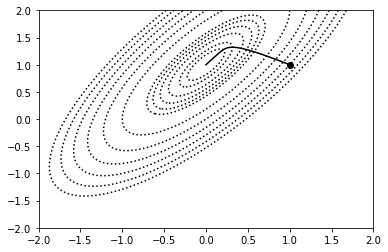

In [12]:
def f(xx):
    x = xx[0]
    y = xx[1]
    return 5 * x**2 - 6 * x * y + 3 * y**2 + 6 * x - 6 * y


def df(xx):
    x = xx[0]
    y = xx[1]
    return np.array([10 * x - 6 * y + 6, -6 * x + 6 * y - 6])


algo = GradienDescent(f, df)
initial = np.array([1, 1])
algo.solve(initial)
print(algo.x_)
print(algo.opt_)

plt.scatter(initial[0], initial[1], color='k', marker='o')
plt.plot(algo.path_[:, 0], algo.path_[:, 1], color='k', linewidth=1.5)
xs = np.linspace(-2, 2, 300)
ys = np.linspace(-2, 2, 300)
xmesh, ymesh = np.meshgrid(xs, ys)
xx = np.r_[xmesh.reshape(1, -1), ymesh.reshape(1, -1)]
levels = [-3, -2.9, -2.8, -2.6, -2.4, -2.2, -2.0, -1, 0, 1, 2, 3, 4]
plt.contour(xs, ys, f(xx).reshape(xmesh.shape), levels=levels, colors='k', linestyles='dotted')
plt.xlim(-2.0, 2.0)
plt.ylim(-2.0, 2.0)

/Users/okuharasho/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in square
  from ipykernel import kernelapp as app
/Users/okuharasho/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/Users/okuharasho/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in subtract
  app.launch_new_instance()
/Users/okuharasho/.pyenv/versions/3.6.5/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'color'
  s)


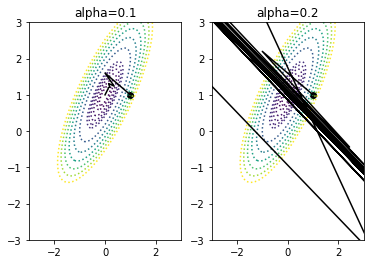

In [15]:
#alphaの値を変えるとどうなるか？

xmin, xmax, ymin, ymax = -3, 3, -3, 3

algos = []
initial = np.array([1, 1])
alphas = [0.1, 0.2]
for alpha in alphas:
    algo = GradienDescent(f, df, alpha)
    algo.solve(np.array(initial))
    algos.append(algo)
    

xs = np.linspace(xmin, xmax, 300)
ys = np.linspace(ymin, ymax, 300)
xmesh, ymesh = np.meshgrid(xs, ys)
xx = np.r_[xmesh.reshape(1, -1), ymesh.reshape(1, -1)]
fig, ax = plt.subplots(1, 2)
levels = [-3, -2.9, -2.8, -2.6, -2.4, -2.2, -2.0, -1, 0, 1, 2, 3, 4]

for i in range(2):
    ax[i].set_xlim((xmin, xmax))
    ax[i].set_ylim((ymin, ymax))
    ax[i].set_title('alpha={}'.format(alphas[i]))
    ax[i].scatter(initial[0], initial[1], color='k', marker='o')
    ax[i].plot(algos[i].path_[:, 0], algos[i].path_[:, 1], color='k', linewidth=1.5)
    ax[i].contour(xs, ys, f(xx).reshape(xmesh.shape), levels=levels, color='k', linestyles='dotted')